In [1]:
from urllib import request
import os
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import decomposition
from sklearn import preprocessing
sns.set()
# Python program to read 
# json file 
 
import json 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant
import re

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\Users\jcrro\anaconda3\envs\EnvP7\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jcrro\anaconda3\envs\EnvP7\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jcrro\anaconda3\envs\EnvP7\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jcrro\anaconda3\envs\EnvP7\lib\site-pa

In [3]:
commentData = pd.read_csv('P7_01_0_training.1600.processed.noemoticon.csv', encoding='ISO-8859-1')

In [4]:
commentData

,target,id,date,flag,user,text
0,4,1467882425,Mon Apr 06 22:38:36 PDT 2009,NO_QUERY,Julia_xxoo,tafe quiz then PHOTOSHOOT with my sezdawg
1,4,1467937329,Mon Apr 06 22:53:54 PDT 2009,NO_QUERY,DeenaWilliams,"@RyanStar Hey Ryan, just thought I'd say that..."
2,4,1468007072,Mon Apr 06 23:13:41 PDT 2009,NO_QUERY,pluggdin,@KesavaReddy mba is good for learning tools/t...
3,4,1468145953,Mon Apr 06 23:58:07 PDT 2009,NO_QUERY,InYourEyes2410,@tommcfly haha morning then. i think (aussie h...
4,4,1468407270,Tue Apr 07 01:28:50 PDT 2009,NO_QUERY,Anjuli_nz,@Azlemed thats good
...,...,...,...,...,...,...
1595,0,2326752569,Thu Jun 25 07:27:54 PDT 2009,NO_QUERY,chrissymassey,i'm so tired!
1596,0,2327023853,Thu Jun 25 07:49:13 PDT 2009,NO_QUERY,brandedyouth,@ispeed72 I hear ya!
1597,0,2327447537,Thu Jun 25 08:21:32 PDT 2009,NO_QUERY,TA_Mobile,Almost of ICsid changed ... No more simple pro...
1598,0,2328250549,Thu Jun 25 09:21:07 PDT 2009,NO_QUERY,Omkaaraa,nobody joined my followers list today ..


In [5]:
df = commentData

In [6]:
train_df = df.drop(["id","date","flag","flag","user"], axis=1)
train_df = train_df.rename(columns={"target": "Sentiment"})
train_df

,Sentiment,text
0,4,tafe quiz then PHOTOSHOOT with my sezdawg
1,4,"@RyanStar Hey Ryan, just thought I'd say that..."
2,4,@KesavaReddy mba is good for learning tools/t...
3,4,@tommcfly haha morning then. i think (aussie h...
4,4,@Azlemed thats good
...,...,...
1595,0,i'm so tired!
1596,0,@ispeed72 I hear ya!
1597,0,Almost of ICsid changed ... No more simple pro...
1598,0,nobody joined my followers list today ..


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl  

In [8]:
train_df['Length'] = train_df['text'].apply(len)

<AxesSubplot:ylabel='Frequency'>

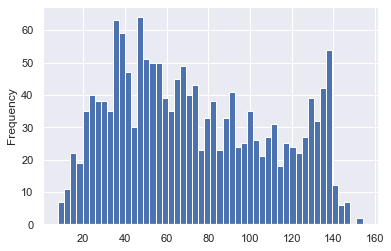

In [9]:
train_df['Length'].plot(kind = 'hist' , bins = 50) 

Text(0.5, 0.98, 'Length via each Sentiment')

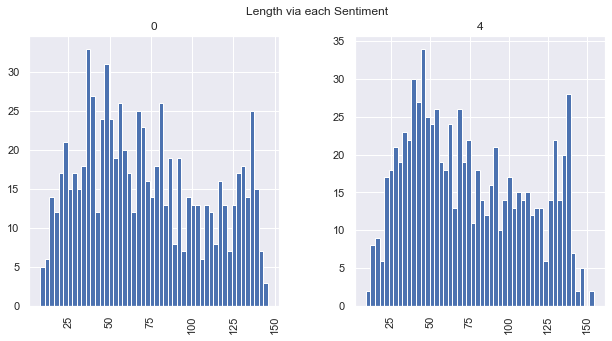

In [10]:
ax = train_df.hist(column = 'Length', by = 'Sentiment', bins = 50 , figsize = (10,5));
pl.suptitle('Length via each Sentiment') 

In [11]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re 
stemming = PorterStemmer()
Lemmatizer = WordNetLemmatizer()
stops = set(stopwords.words("english"))
stops2 = set(stopwords.words("french"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jcrro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jcrro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jcrro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:

def clean_str(x):
    
    x = str(x)
   
    # Convert to lower case
    text = x.lower()
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Keep only words (removes punctuation + numbers)
    # use .isalnum to keep also numbers
    token_words = [w for w in tokens if w.isalpha()]
    
    # Stemming
    #stemmed_words = [stemming.stem(w) for w in token_words]

    # lemmatizer    
    lemmatizer_words = [Lemmatizer.lemmatize(w) for w in token_words]
    
    # Remove stop words
    meaningful_words = [w for w in token_words if not w in stops]
    
    # Remove stop words
    meaningful_words2 = [w for w in meaningful_words if not w in stops2]   
    
    # Rejoin meaningful stemmed words
    joined_words = ( " ".join(meaningful_words2))

    
    # Return cleaned data
    return joined_words


train_df['text'] = train_df['text'].apply(clean_str)

In [13]:
train_df

,Sentiment,text,Length
0,4,tafe quiz photoshoot sezdawg,42
1,4,ryanstar hey ryan thought say u put great show...,131
2,4,kesavareddy mba good learning one start taking...,110
3,4,tommcfly haha morning think aussie wheat bix h...,98
4,4,azlemed thats good,20
...,...,...,...
1595,0,tired,14
1596,0,hear ya,21
1597,0,almost icsid changed simple programmers,55
1598,0,nobody joined followers list today,41


In [14]:
print(train_df)

      Sentiment                                               text  Length
0             4                       tafe quiz photoshoot sezdawg      42
1             4  ryanstar hey ryan thought say u put great show...     131
2             4  kesavareddy mba good learning one start taking...     110
3             4  tommcfly haha morning think aussie wheat bix h...      98
4             4                                 azlemed thats good      20
...         ...                                                ...     ...
1595          0                                              tired      14
1596          0                                            hear ya      21
1597          0            almost icsid changed simple programmers      55
1598          0                 nobody joined followers list today      41
1599          0                                       think either      36

[1600 rows x 3 columns]


In [15]:
df = train_df
df

,Sentiment,text,Length
0,4,tafe quiz photoshoot sezdawg,42
1,4,ryanstar hey ryan thought say u put great show...,131
2,4,kesavareddy mba good learning one start taking...,110
3,4,tommcfly haha morning think aussie wheat bix h...,98
4,4,azlemed thats good,20
...,...,...,...
1595,0,tired,14
1596,0,hear ya,21
1597,0,almost icsid changed simple programmers,55
1598,0,nobody joined followers list today,41


In [16]:
df_0 = df[df['Sentiment'] == 0].sample(frac=1)
df_4 = df[df['Sentiment'] == 4].sample(frac=1)

# we want a balanced set for training against - there are 7072 `0` examples
sample_size = min(len(df_0), len(df_4))

data = pd.concat([df_0.head(sample_size), df_4.head(sample_size)]).sample(frac=1)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

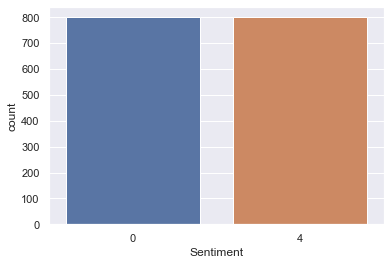

In [17]:
import seaborn as sns

sns.countplot(x='Sentiment', data=data)

In [18]:
sentences = data['text']

In [19]:
sentences[0]

'tafe quiz photoshoot sezdawg'

In [20]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(sentences)
sequence = tokenizer.texts_to_sequences(sentences)

In [21]:
index_of_words = tokenizer.word_index
print(len(index_of_words))

4412


In [22]:
embed_num_dims = 100
max_seq_len = 1000

In [23]:
padded_seq = pad_sequences(sequence , maxlen = max_seq_len )

In [24]:
padded_seq

array([[   0,    0,    0, ...,  141,  245,  785],
       [   0,    0,    0, ..., 1292, 1293,  246],
       [   0,    0,    0, ...,   15,  107,   40],
       ...,
       [   0,    0,    0, ..., 1276,   31,  259],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,  227,  170,  298]])

In [25]:
Y = pd.get_dummies(data['Sentiment']).values

In [26]:
Y

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [27]:
from keras.utils import to_categorical


In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(padded_seq,Y ,train_size = 0.55)

In [29]:
Y_train.shape

(880, 2)

### Glove 

In [30]:
f = open('glove.6B.100d.txt', encoding="utf8")
embedd_index = {}
for line in f:
    val = line.split()
    word = val[0]
    coff = np.asarray(val[1:],dtype = 'float')
    embedd_index[word] = coff

f.close()
print('Found %s word vectors.' % len(embedd_index))

Found 400001 word vectors.


In [31]:
embedd_index['bad']

array([ 0.39456  , -0.24717  ,  1.0319   , -0.61444  , -1.2376   ,
        0.051794 , -0.55112  , -0.31014  , -0.025735 , -0.24709  ,
        0.25836  ,  0.34899  ,  0.46176  ,  0.44237  ,  0.354    ,
        0.21262  , -0.26312  , -0.17128  ,  0.44013  ,  1.1284   ,
        0.37259  ,  0.41969  , -0.2534   , -0.051885 , -0.34917  ,
        0.15298  , -0.68444  , -0.19514  , -0.018647 ,  0.084191 ,
        0.14569  ,  0.3869   ,  0.023524 , -0.37861  , -0.65081  ,
        0.010398 , -0.50087  , -0.087368 ,  0.098617 , -0.21907  ,
       -0.072412 , -0.10247  , -0.3148   , -0.307    , -0.30457  ,
       -0.14329  ,  0.10313  , -0.040487 , -0.095922 , -1.192    ,
       -0.063356 ,  0.034127 , -0.057674 ,  0.56582  ,  0.082541 ,
       -2.4617   ,  0.48029  ,  0.72806  ,  1.2841   ,  0.10672  ,
       -0.045119 ,  1.0117   , -0.97928  ,  0.022828 ,  0.46876  ,
       -0.026875 ,  0.80018  , -0.23101  ,  0.086699 , -0.74338  ,
       -0.38738  , -0.1924   , -0.13292  ,  0.52347  ,  0.3565

In [32]:
embedding_matrix = np.zeros((len(index_of_words) + 1, embed_num_dims))

tokens = []
labels = []

for word,i in index_of_words.items():
    temp = embedd_index.get(word)
    if temp is not None:
        embedding_matrix[i] = temp
        
#for plotting
        tokens.append(embedding_matrix[i])
        labels.append(word)

In [33]:
embedding_matrix.shape

(4413, 100)

(200, 2)


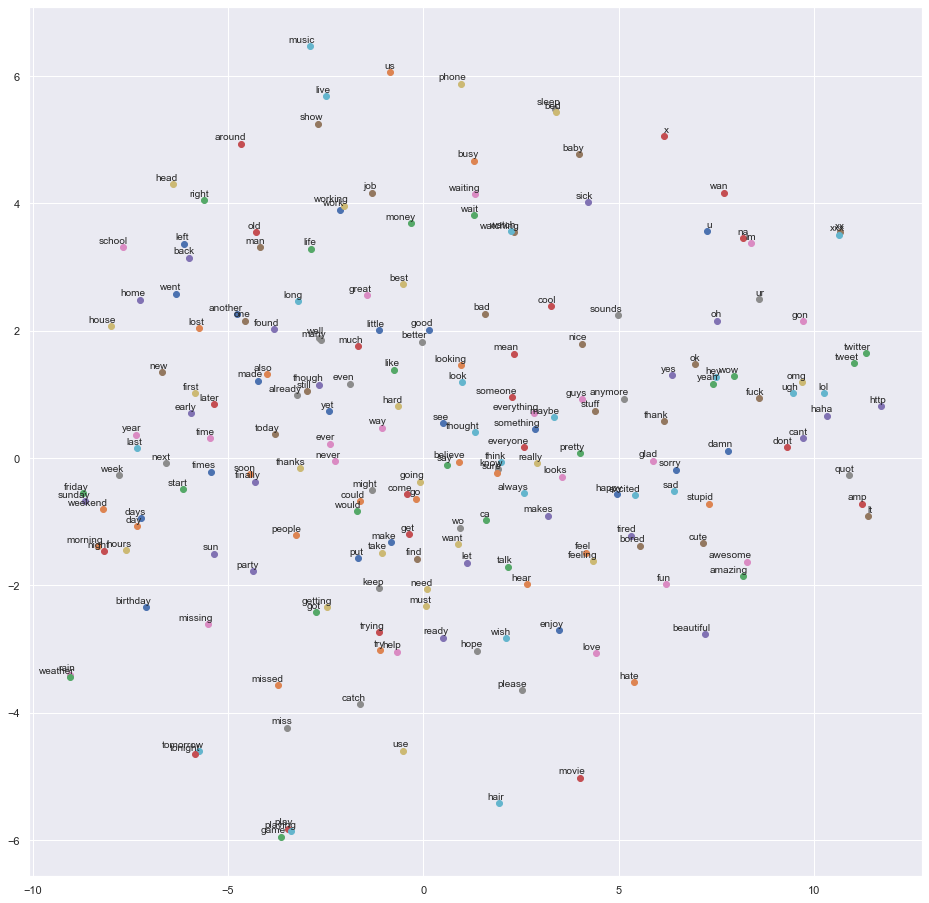

In [34]:
from sklearn.manifold import TSNE
#TSNE algorithm used to visualize word embeddings having huge amount (100) dimensions

def tsne():
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens[:200])
    print(new_values.shape)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16,16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne()

In [35]:
#Embedding layer before the actaul BLSTM 
embedd_layer = Embedding(len(index_of_words) + 1 , embed_num_dims , input_length = max_seq_len , weights = [embedding_matrix])

## LSTM avec GLOVE 

In [36]:
model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=1000, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    LSTM(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(2, activation = 'sigmoid')
])


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 100)         441300    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 1000, 100)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000, 25)          12600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1000, 25)          100       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 25)          0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)               

In [38]:
from keras.models import model_from_json
def load():
    load_json = open("weights.json",'r')
    loaded = load_json.read()
    load_json.close()
    load = model_from_json(loaded)
    load.load_weights("model.h5")
    print("Loaded")
    model = load

In [39]:
from keras.optimizers import Adam
add = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy' , optimizer = add , metrics = ['accuracy'])

In [40]:
hist = model.fit(X_train,Y_train,epochs = 5 , batch_size = 100, validation_data = (X_test,Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 880 samples, validate on 720 samples
Epoch 1/5
880/880 [==============================] - 5s 6ms/step - loss: nan - accuracy: 0.5034 - val_loss: nan - val_accuracy: 0.5069
Epoch 2/5
880/880 [==============================] - 5s 6ms/step - loss: nan - accuracy: 0.4943 - val_loss: nan - val_accuracy: 0.5069
Epoch 3/5
880/880 [==============================] - 5s 6ms/step - loss: nan - accuracy: 0.4943 - val_loss: nan - val_accuracy: 0.5069
Epoch 4/5
880/880 [==============================] - 5s 6ms/step - loss: nan - accuracy: 0.4943 - val_loss: nan - val_accuracy: 0.5069
Epoch 5/5
880/880 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.4943 - val_loss: nan - val_accuracy: 0.5069


In [41]:
result = model.evaluate(X_test,Y_test, verbose=0)
print("Accuracy: %.2f%%" % (result[1] * 100))

Accuracy: 50.69%


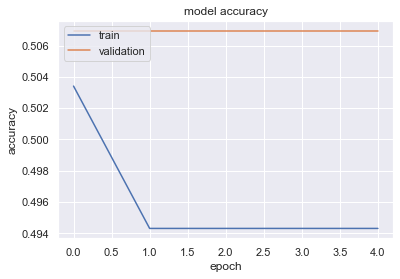

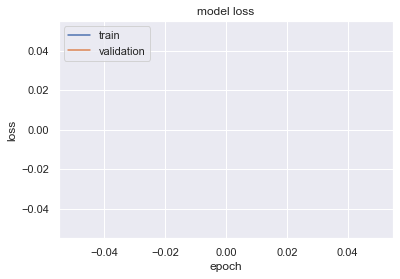

In [42]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()